In [1]:
# Imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append('../../../')

from src import customFunc as cf
from src import ansatzs as anz
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.fake_provider import FakeManila
import time

import pyscf
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.fake_provider import FakeGuadalupeV2
from qiskit.providers.aer import AerSimulator

/home/dperezgcia/miniconda3/envs/qml_avoiding_bp/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)



Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.09644358214795515
Varianza de la derivada: 1.438092220493158e-32

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.030930321176005086
Varianza de la derivada: 1.3342177961442397e-32

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.011223021325908545
Varianza de la derivada: 9.18047972185377e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.004426825473419349
Varianza de la derivada: 7.077585023382638e-33

Pendiente para valor esperado: -0.5128798113187701.
R^2 para valor esperado: 0.9979540611539913.

Pendiente para derivada: -0.12503800113293906.
R^2 para derivada: 0.9481959001567104.


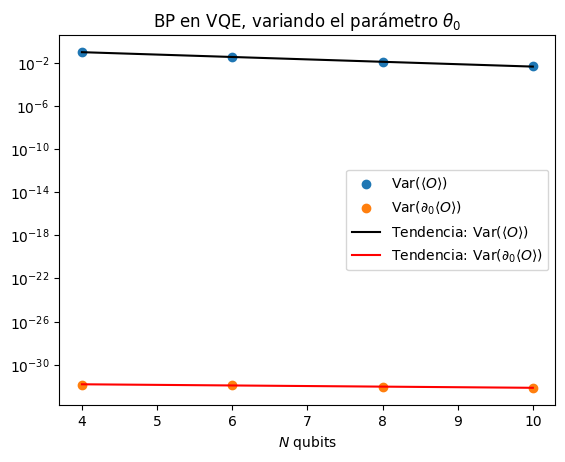

In [2]:
obs = FermionicOp({"+_1 -_0": 1.0})
mapper = JordanWignerMapper()
obs_qubit = mapper.map(obs)

def build_UCCSD_ansatz(num_qubits, obs_qubit):

    num_spatial_orbitals = num_qubits // 2
    n_alpha = n_beta = num_spatial_orbitals - 1
    num_particles = (n_alpha, n_beta)

    hf_initial_state = HartreeFock(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper
    )

    ansatz = UCCSD(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper,
        initial_state=hf_initial_state
    )

    return ansatz, ansatz.num_parameters

ansatz, num_params = build_UCCSD_ansatz(4, obs_qubit)
ansatz.decompose().draw("mpl")

data = []
data.append(cf.variance_vs_nQubits(build_UCCSD_ansatz, 4, 10, obs_qubit, 0, 1000, True, True, True, True))